# Mutil class Image Classification
In this problem, we are going to step things up with 10 classes of food (multi class classification problem)
1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evalute the model
6. Adjust different hyper parameters and improve our model (try to beat baseline/overfitting)
7. Repeak until satisfied

## 1. Become one with the data

In [1]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-12-09 05:33:04--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.120.128, 142.250.128.128, 142.251.6.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.120.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   183MB/s    in 2.7s    

2021-12-09 05:33:07 (183 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
!ls 10_food_classes_all_data/train

chicken_curry  fried_rice      hamburger  pizza  steak
chicken_wings  grilled_salmon  ice_cream  ramen  sushi


In [3]:
import os
# Lets walk though our data
for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in 10_food_classes_all_data
There are 10 directories and 0 images in 10_food_classes_all_data/test
There are 0 directories and 250 images in 10_food_classes_all_data/test/ice_cream
There are 0 directories and 250 images in 10_food_classes_all_data/test/steak
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_curry
There are 0 directories and 250 images in 10_food_classes_all_data/test/ramen
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_wings
There are 0 directories and 250 images in 10_food_classes_all_data/test/hamburger
There are 0 directories and 250 images in 10_food_classes_all_data/test/pizza
There are 0 directories and 250 images in 10_food_classes_all_data/test/sushi
There are 0 directories and 250 images in 10_food_classes_all_data/test/fried_rice
There are 0 directories and 250 images in 10_food_classes_all_data/test/grilled_salmon
There are 10 directories and 0 images in 10_fo

In [4]:
# Setup the train and test directories
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/' 

In [5]:
os.listdir('10_food_classes_all_data/train')

['ice_cream',
 'steak',
 'chicken_curry',
 'ramen',
 'chicken_wings',
 'hamburger',
 'pizza',
 'sushi',
 'fried_rice',
 'grilled_salmon']

In [6]:
# Lets get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted(item.name for item in data_dir.glob('*')))
print(class_names)


['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [7]:
# Visualize, visualize and visualize
import random
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
# Lets create a function to view a random image
def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  # Lets read the image
  random_image = random.sample(os.listdir(target_folder), 1)
  print(f'Random image : {random_image}')

  # Lets read the image
  img = mpimg.imread(target_folder+'/'+random_image[0])
  plt.title(f'class_name : {target_class}')
  plt.axis('off')
  plt.imshow(img)
  return img


Random image : ['337272.jpg']


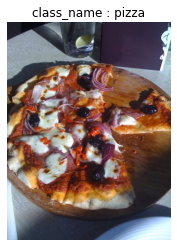

In [8]:
img = view_random_image(train_dir, random.choice(class_names))

## 2. Preprocess the data (prepare it for model)

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the images
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Loas data from the directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')



Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3. Create a model (start with a base line)
CNN explainer website..how about we take their model which is also on 10 classes and use it on our problem
https://poloclub.github.io/cnn-explainer/

In [10]:
# Set the random seed
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
 tf.keras.layers.Conv2D(filters=10,
                        kernel_size=3,
                        padding='valid',
                        input_shape=(224,224,3),
                        activation='relu'),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=2),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation='softmax') # change to have 10 classes and activation function as softmax
])

# Compile the model

model_1.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data, epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data = test_data,
                       validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 68s 233ms/step - loss: 2.1799 - accuracy: 0.1845 - val_loss: 2.0659 - val_accuracy: 0.2632
Epoch 2/5
235/235 [==============================] - 55s 233ms/step - loss: 1.9930 - accuracy: 0.2965 - val_loss: 1.9846 - val_accuracy: 0.2980
Epoch 3/5
235/235 [==============================] - 55s 232ms/step - loss: 1.7716 - accuracy: 0.3955 - val_loss: 1.9126 - val_accuracy: 0.3276
Epoch 4/5
235/235 [==============================] - 55s 233ms/step - loss: 1.2811 - accuracy: 0.5693 - val_loss: 2.1956 - val_accuracy: 0.3156
Epoch 5/5
235/235 [==============================] - 55s 233ms/step - loss: 0.6909 - accuracy: 0.7769 - val_loss: 3.0382 - val_accuracy: 0.2956


## 5. Evaluate the model

In [11]:
model_1.evaluate(test_data)

79/79 [==============================] - 13s 158ms/step - loss: 3.0382 - accuracy: 0.2956


[3.0382485389709473, 0.2955999970436096]

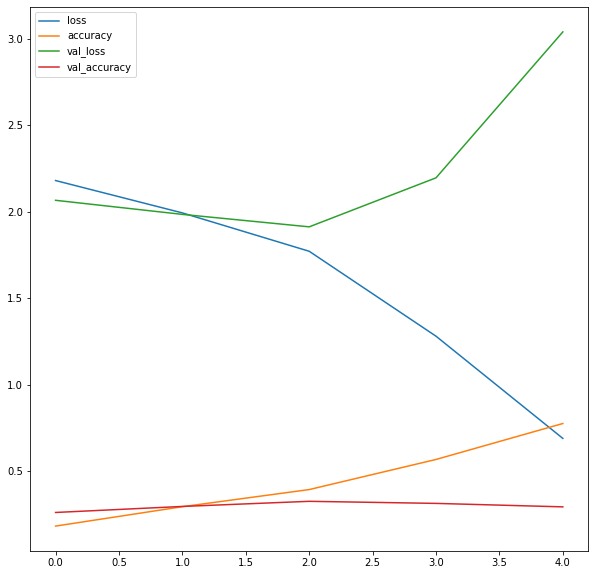

In [12]:
import pandas as pd
# Plot the learning curves
pd.DataFrame(history_1.history).plot(figsize=(10,10))

In [13]:
print(history_1.history['loss'])

[2.1799492835998535, 1.9930248260498047, 1.7715518474578857, 1.2810673713684082, 0.6909080147743225]


In [14]:
# Plot the learning curves separately
# Lets define a function
def plot_loss_curves(history):
  train_loss = history.history['loss']
  valid_loss = history.history['val_loss']

  train_accuracy = history.history['accuracy']
  test_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot the curves
  plt.plot(epochs, train_loss, label='Training loss')
  plt.plot(epochs, valid_loss, label='Test loss')
  plt.title('Loss Curves')
  plt.xlabel('epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, train_accuracy, label='Training accuracy')
  plt.plot(epochs, test_accuracy, label='Test accuracy')
  plt.title('Accuarcy Curves')
  plt.xlabel('epochs')
  plt.legend()

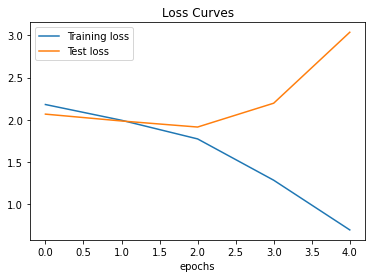

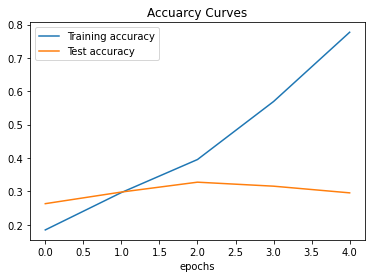

In [15]:
plot_loss_curves(history_1)

What do these loss curves tell us??


Well, it seems that our model is overfitting the training set badly, in other words it is getting great results on the training data but fails to generalize for the unseen data and performs poorly on the test dataset...

## 6. Adjust the model hyper parameters to beat the our baseline or overfitting

Due to its performance on training data, it is clear that our model is learning something but not generalizing to the new data (overfitting)
So lets try and fix overfitting by...
1. **Get more data** - having more data gives a model more opportunity to learn more diverse patterns..
2. **Simplify the model** - If the curren model is overfitting the data, it is may be too complicated a model, one way to simplify the model is to reduce # of layers or reduce # of hidden units in layers 
3. **Data Augmentation** - Data augmentation manipulates the training data in such a way to add more diversity to it without altering the original data.
**Use Transfer Learning** - Transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset

In [16]:
# How about we try and simplify the model first
# Lets try to remove two convolutional layers...

# Lets build the simplified model
model_2 = tf.keras.Sequential([
 tf.keras.layers.Conv2D(10, 3, input_shape=(224, 224, 3), activation='relu'),
 tf.keras.layers.MaxPool2D(pool_size=2),
 tf.keras.layers.Conv2D(10, 3, activation='relu'),
 tf.keras.layers.MaxPool2D(pool_size=2),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_2.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data, epochs=5,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 51s 212ms/step - loss: 2.0951 - accuracy: 0.2583 - val_loss: 1.9274 - val_accuracy: 0.3228
Epoch 2/5
235/235 [==============================] - 50s 212ms/step - loss: 1.7349 - accuracy: 0.4139 - val_loss: 1.9042 - val_accuracy: 0.3568
Epoch 3/5
235/235 [==============================] - 50s 211ms/step - loss: 1.4052 - accuracy: 0.5409 - val_loss: 1.9391 - val_accuracy: 0.3416
Epoch 4/5
235/235 [==============================] - 50s 213ms/step - loss: 0.9140 - accuracy: 0.7208 - val_loss: 2.2855 - val_accuracy: 0.3208
Epoch 5/5
235/235 [==============================] - 50s 213ms/step - loss: 0.4846 - accuracy: 0.8691 - val_loss: 2.6776 - val_accuracy: 0.2892


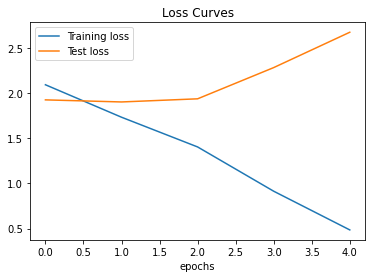

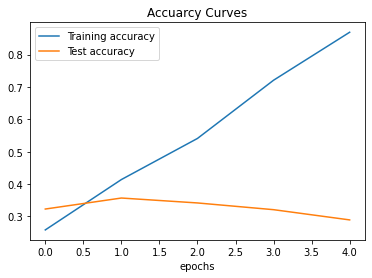

In [17]:
# Check out the loss curves
plot_loss_curves(history_2)

In [18]:
model_2.summary(),  model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 10)               

(None, None)

Looks like our simplifying the model experiment didn't work out
the accuracy went down and overfitting continued...
How about we try data augmentation???

## Trying to reduce overfitting by data augmentation

Lets try and improve our model's result by augmenting the training data

Ideally we want to :
* Reduce overfitting (get the train and validation loss curves come closer)
* Improve validation accuracy 

In [19]:
# Lets  create an augmeneted ImageDataGenerator Instance
train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode='categorical',
                                                                   shuffle=True)


Found 7500 images belonging to 10 classes.


In [20]:
# Lets create another model but this time we will fit it on the augmented training data
model_3 = tf.keras.Sequential([
 tf.keras.layers.Conv2D(10, 3, activation='relu'),
 tf.keras.layers.Conv2D(10, 3, activation='relu'),
 tf.keras.layers.MaxPool2D(pool_size=2),
 tf.keras.layers.Conv2D(10, 3, activation='relu'),
 tf.keras.layers.Conv2D(10, 3, activation='relu'),
 tf.keras.layers.MaxPool2D(pool_size=2),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_3.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data_augmented, epochs=20,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data= test_data,
                        validation_steps = len(test_data))

Epoch 1/20
235/235 [==============================] - 130s 551ms/step - loss: 2.2630 - accuracy: 0.1481 - val_loss: 2.2022 - val_accuracy: 0.1808
Epoch 2/20
235/235 [==============================] - 129s 551ms/step - loss: 2.1183 - accuracy: 0.2357 - val_loss: 1.9403 - val_accuracy: 0.3192
Epoch 3/20
235/235 [==============================] - 129s 551ms/step - loss: 2.0015 - accuracy: 0.2981 - val_loss: 1.8602 - val_accuracy: 0.3608
Epoch 4/20
235/235 [==============================] - 129s 549ms/step - loss: 1.9335 - accuracy: 0.3295 - val_loss: 1.7963 - val_accuracy: 0.3928
Epoch 5/20
235/235 [==============================] - 129s 550ms/step - loss: 1.8969 - accuracy: 0.3449 - val_loss: 1.7305 - val_accuracy: 0.4196
Epoch 6/20
235/235 [==============================] - 130s 553ms/step - loss: 1.8744 - accuracy: 0.3585 - val_loss: 1.6983 - val_accuracy: 0.4324
Epoch 7/20
235/235 [==============================] - 129s 551ms/step - loss: 1.8527 - accuracy: 0.3681 - val_loss: 1.6983 -

In [21]:
model_3.evaluate(test_data)

79/79 [==============================] - 13s 158ms/step - loss: 1.5598 - accuracy: 0.4856


[1.5597983598709106, 0.48559999465942383]

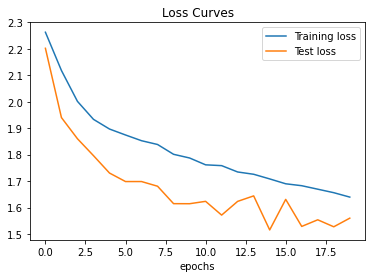

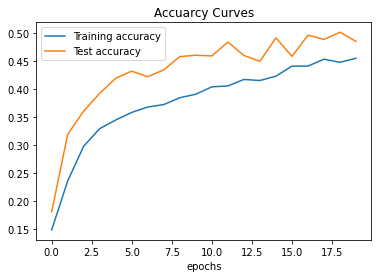

In [23]:
plot_loss_curves(history_3)

### So far, the maximum we achieved a maximum accuracy of 45% on the training images with model_3 with 20 epochs
### What if we used an already available pretrained model of `EfficientNetB7`
To know more about `EfficinetNet` models, [click here](https://tfhub.dev/google/efficientnet/b7/classification/1)

In [29]:
# Now, lets create final model but this time we will use transfer learning 
# Using EfficientnetB7 feature extraction layer and using augmented data to fit on the train images for upto 5 epochs
base_model = tf.keras.applications.EfficientNetB7(include_top=False)
base_model.trainable=False
inputs = tf.keras.layers.Input(shape=(224,224,3), name="input_layer")
x = tf.keras.layers.experimental.preprocessing.Rescaling(1.*255) (inputs) # The EffcicientNetB7 has a built in layer for rescaling between 0 and 1, hence, we have to multiply our train_data by 255. since in our train_data, we have rescaled our images between 0 and 1
x = base_model(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(32, activation="relu")(x)
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)
model_4 = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model_4.compile(loss = tf.keras.losses.categorical_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_4 = model_4.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=int(0.25*len(train_data)),
                        validation_data= test_data,
                        validation_steps = int(0.25*len(test_data)))

Epoch 1/5
58/58 [==============================] - 88s 1s/step - loss: 1.1305 - accuracy: 0.6601 - val_loss: 0.5814 - val_accuracy: 0.8322
Epoch 2/5
58/58 [==============================] - 60s 1s/step - loss: 0.6152 - accuracy: 0.8066 - val_loss: 0.4465 - val_accuracy: 0.8766
Epoch 3/5
58/58 [==============================] - 61s 1s/step - loss: 0.5682 - accuracy: 0.8173 - val_loss: 0.3980 - val_accuracy: 0.8865
Epoch 4/5
58/58 [==============================] - 60s 1s/step - loss: 0.5264 - accuracy: 0.8249 - val_loss: 0.3939 - val_accuracy: 0.8849
Epoch 5/5
58/58 [==============================] - 61s 1s/step - loss: 0.4529 - accuracy: 0.8486 - val_loss: 0.3935 - val_accuracy: 0.8849


In [30]:
model_4.evaluate(test_data)

79/79 [==============================] - 62s 782ms/step - loss: 0.4003 - accuracy: 0.8688


[0.40032505989074707, 0.8687999844551086]

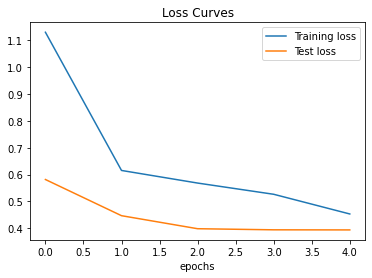

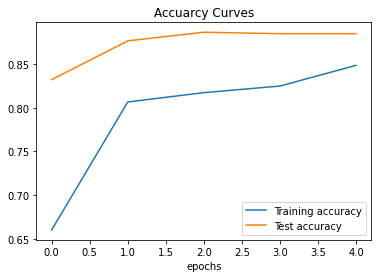

In [31]:
plot_loss_curves(history_4)

Woah!! that looks much better, loss curves are much closer to each other than base line model and heading in the right directions, so if we were to train for longer, we might see further improvement

## 7. Repeat until satisfied
We could keep going, continually trying to bring our loss curves closer together and trying to improve the validation/test accuracy

How??
* By running lots of experiments
- restructuring the model's architecture (increasing layers/hidden units)
- adjust the learning rate
- try different methods of data augmentation (adjust the hyperparameters in out ImageDataGenerator instance)
- Try training for longer e.g. 10 epochs instead of 5 epochs
- try **transfer learning** 

### Lets make a prediction with our trained model
Lets use our trained model to make predictions on our custom images

In [32]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [33]:
# Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg


--2021-12-09 07:17:25--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  5.99MB/s    in 0.3s    

2021-12-09 07:17:26 (5.99 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]

--2021-12-09 07:17:26--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200

In [34]:
def load_and_prep(filename, img_shape=224):
  # Read the image
  img = tf.io.read_file(filename)
  # Covert the image into a tensor
  img = tf.image.decode_image(img)
  # resize the image
  img = tf.image.resize(img, [img_shape, img_shape])

  # Scale the image
  img = img/255.

  return img

In [35]:
list(class_names)

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [36]:
def pred_and_plot(model, filename, class_names):
  #import the target image and preprocess it
  img = load_and_prep(filename)
  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  print(pred)
  

  # Add in logic for multiclass & get the predicted class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]
  
  # Plot the image and the predicted class
  plt.imshow(img)
  print(f"Prediction : {pred_class}")
  plt.axis('off')


[[3.7514787e-02 1.1306145e-02 7.7420031e-03 9.3772456e-02 7.0641784e-04
  1.5766034e-03 4.9670337e-04 6.3719071e-02 7.7433699e-01 8.8288393e-03]]
Prediction : steak


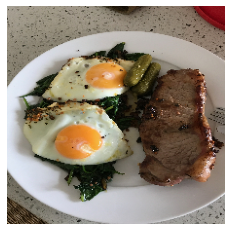

In [37]:
# Test out model on a custom image
pred_and_plot(model_4, '03-steak.jpeg', class_names)

### The above `pred_and_plot` function works with binary classification too

## Saving and loading our model

In [38]:
# Save a model
model_4.save('saved_trained_model_4')


INFO:tensorflow:Assets written to: saved_trained_model_4/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


In [39]:
# Load in a trained model and evaluate it 
loaded_model_4 = tf.keras.models.load_model('saved_trained_model_4')
loaded_model_4.evaluate(test_data)

79/79 [==============================] - 67s 775ms/step - loss: 0.4003 - accuracy: 0.8688


[0.4003249406814575, 0.8687999844551086]